**Extraccion datos api**

"https://earthquake.usgs.gov/"

# Parte 1

### Importacion de librerias a utilizar

In [2]:
import requests,json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

## 1) Obtenga los datos de todos los sismos ocurridos entre el 1 de Enero del 2010 y el día 5 de Diciembre del 2019, que tengan una magnitud mínima de 5 grados, en formato JSON (para efectos de la API, el formato a solicitar es el llamado “geojson”).mundo. Toda la documentación de la API en cuestión se encuentra en https://earthquake.usgs.gov/fdsnws/event/1/.


Mediante la libreria **Request** y el comando **get** obtenemos la informacion de la api, lo cual nos entrega como respuesta (**200**), Lo cual significa que el requerimiento de la informacion fue positiva. Luego mediante Json, obtenemos la informacion (**contenido**) lo cual sera en formato diccionario.

In [3]:
url="https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2010-01-01&endtime=2019-12-05&minmagnitude=5"
respuesta = requests.get(url)
contenido=respuesta.json()

## 2) A partir de la información disponible en el diccionario generado, construya un DataFrame que muestre los registros de cada uno de los sismos antes mencionados. 

Puede resultar conveniente obtener el número de registros extraídos disponible en el subdiccionario “metadata”, y recorrer el subdiccionario “**features**” con aquella información.


In [4]:
temblores = json_normalize(contenido['features'])

Mediante la libreria (**json_normalize**) transformamos el contenido del diccionario  $'features'$ que esta anidado dentro del diccionario  $'contenido'$ en un DataFrame y asi trabajar mejor los datos.

In [5]:
print(f'Cantidad de filas {temblores.shape[0]}, columnas {temblores.shape[1]}')

Cantidad de filas 18242, columnas 30


## 3) Genere con exactitud los siguientes dos gráficos para explorar el DataFrame indicado:


Genere además, un tercer gráfico que considere relevante para estos efectos, y explique las razones del porqué lo eligió.


### 3.1) Gráfico de barras horizontal que entregue los 25 lugares con mayor frecuencia de sismos en la década. 

In [6]:
graf1_maxplace=temblores['properties.place'].value_counts().head(25).sort_values()

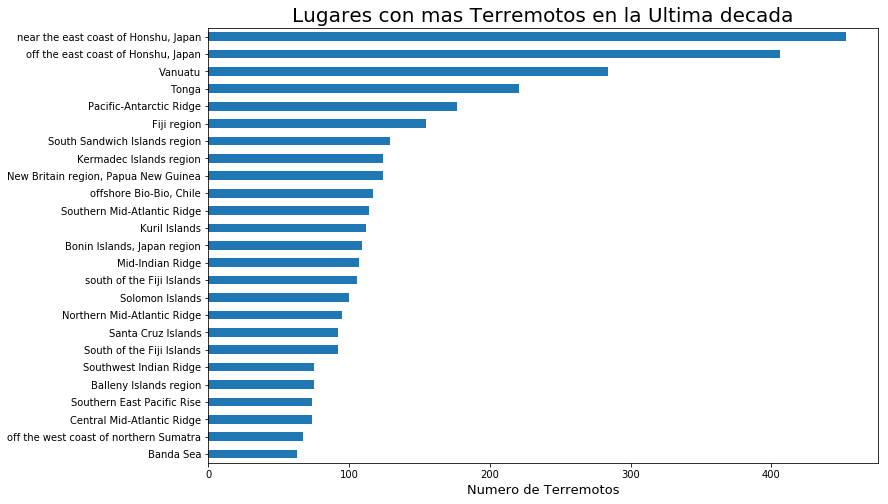

In [7]:
plt.figure(figsize=(12,8))
graf1_maxplace.plot(kind='barh')
plt.title('Lugares con mas Terremotos en la Ultima decada',fontdict={'fontsize':20})
plt.xlabel('Numero de Terremotos',fontdict={'fontsize':13});

### 3.2) Histograma que muestre la distribución de sismos entre 6 grados y el máximo observado. 
Explore cómo fijar los márgenes del gráfico para que no se muestren en el eje x valores menores a 6 grados)

In [8]:
graf2_hist=temblores['properties.mag'][temblores['properties.mag']>=6.0]

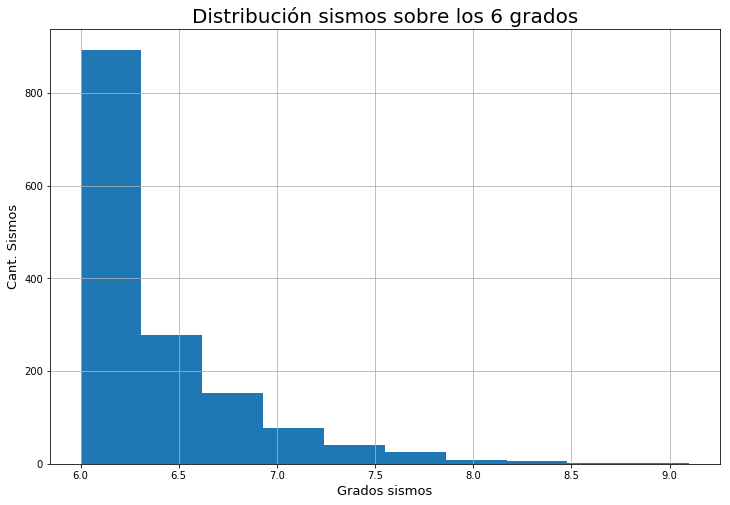

In [9]:
plt.figure(figsize=(12,8))
graf2_hist.plot(kind='hist',grid=True)
plt.title('Distribución sismos sobre los 6 grados',fontdict={'fontsize':20})
plt.ylabel('Cant. Sismos',fontdict={'fontsize':13})
plt.xlabel('Grados sismos',fontdict={'fontsize':13});

### 3.3) Genere además, un tercer gráfico que considere relevante para estos efectos, y explique las razones del porqué lo eligió.



In [10]:
graf3_tsunami= temblores['properties.tsunami'].value_counts()

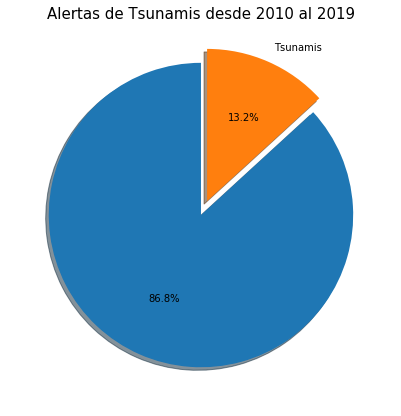

In [11]:
plt.figure(figsize=(15,7))
graf3_tsunami.plot(kind='pie',startangle=90,autopct='%1.1f%%', explode=(0,0.1), labels=('','Tsunamis'),shadow=True)
plt.title('Alertas de Tsunamis desde 2010 al 2019',fontdict={'fontsize':15})
plt.ylabel('');

Escogi el grafico de 'PIE' para mostrar el porcentaje de Alertas de Tsunami del total de Sismos en una decada

## 4) Note que la columna “time” no está en formato “año/mes/dia hora/min/seg”. Para poder trabajar de mejor manera aquel dato, genere 6 nuevas columnas en el DataFrame, en la cual se guarden año, mes, dia, hora, min y seg de cada evento.


In [12]:
time= []
for x in temblores['properties.time']:
    when = datetime.datetime.fromtimestamp(x/1000).strftime('%Y-%m-%d-%H-%M-%S%z')
    time.append('{0}'.format(when))
time = pd.DataFrame(time,columns={'Time'})

In [13]:
time=time['Time'].str.split('-',5, expand=True).rename(columns={0:'Año',1:'Mes',2:'Dia',3:'Hora',4:'Min',5:'Seg'})

In [14]:
temblores=pd.concat([temblores,time],axis=1)

In [15]:
temblores.columns

Index(['geometry.coordinates', 'geometry.type', 'id', 'properties.alert',
       'properties.cdi', 'properties.code', 'properties.detail',
       'properties.dmin', 'properties.felt', 'properties.gap',
       'properties.ids', 'properties.mag', 'properties.magType',
       'properties.mmi', 'properties.net', 'properties.nst',
       'properties.place', 'properties.rms', 'properties.sig',
       'properties.sources', 'properties.status', 'properties.time',
       'properties.title', 'properties.tsunami', 'properties.type',
       'properties.types', 'properties.tz', 'properties.updated',
       'properties.url', 'type', 'Año', 'Mes', 'Dia', 'Hora', 'Min', 'Seg'],
      dtype='object')

## 5) Construya dos nuevas columnas binarias:
* Una columna que tome valor 1 cuando el sismo ocurrió en Chile y tome valor 0 si no
* Una columna que tome valor 1 si el sismo tuvo una magnitud mayor que 6 grados y 0 si no.



In [16]:
temblores['Sismo_Chile']=np.where((temblores['properties.place'].str.contains('Chile')),1,0)
temblores['Grado_sismo']=np.where((temblores['properties.mag']>6),1,0)

In [17]:
temblores[['properties.place','properties.mag','Sismo_Chile','Grado_sismo']].head()

,properties.place,properties.mag,Sismo_Chile,Grado_sismo
0,"62km NNE of Isangel, Vanuatu",6.0,0,0
1,"43km S of Jarm, Afghanistan",5.0,0,0
2,"200km NW of Saumlaki, Indonesia",5.0,0,0
3,"10km NE of Daigo, Japan",5.0,0,0
4,"111km ESE of Shikotan, Russia",5.2,0,0


## 6) Genere un nuevo DataFrame a partir del anterior, manteniendo solo las siguientes columnas:
* code
* mag
* alert
* place
* sig
* tsunami
* title
 
* las 6 columnas construidas en el punto 4.
* las 2 columnas binarias construidas en el punto 5.


In [18]:
sismos=temblores[['properties.code','properties.mag','properties.alert','properties.place','properties.sig','properties.tsunami','properties.title','Año', 'Mes', 'Dia', 'Hora', 'Min', 'Seg','Sismo_Chile','Grado_sismo']]

In [19]:
sismos.columns=sismos.columns.str.replace('properties.','')#quitamos la palabra properties de las columnas

In [20]:
sismos[['Año','Mes','Dia','Hora','Min','Seg']]=sismos[['Año','Mes','Dia','Hora','Min','Seg']].astype(int,inplace=False)

E:\MachineLearning\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [21]:
sismos= sismos.rename(columns={'code':'codigo','mag':'magnitud','alert':'alerta','place':'lugar','sig':'señal','title':'titulo'})

In [22]:
sismos.dtypes

codigo          object
magnitud       float64
alerta          object
lugar           object
señal            int64
tsunami          int64
titulo          object
Año              int32
Mes              int32
Dia              int32
Hora             int32
Min              int32
Seg              int32
Sismo_Chile      int32
Grado_sismo      int32
dtype: object

## 7) Genere tres DataFrames donde cada uno almacene los sismos de los años 2010, 2015 y 2018 respectivamente. Expórtelos en 3 csv distintos. Nombrelos como “earthquakes_mag6_2010.csv”, “earthquakes_mag6_2015.csv” y “earthquakes_mag6_2018.csv” respectivamente.


In [23]:
sismos_2010= sismos[sismos['Año']==2010]
sismos_2015= sismos[sismos['Año']==2015]
sismos_2018= sismos[sismos['Año']==2018]

Vemos cuantas filas y columnas tiene sismos_2010

In [24]:
sismos_2010.shape

(2393, 15)

Cuantas filas y columnas tiene sismos_2015

In [25]:
sismos_2015.shape

(1560, 15)

Cuantas filas y columnas tiene sismos_2018

In [26]:
sismos_2018.shape

(1806, 15)

Exportamos los archivos a **CSV** mediante el comando **to_csv** en la misma ubicacion de nuestro jupyter-notebook

In [27]:
# #grabar archivos csv
sismos_2010.to_csv('earthquakes_mag6_2010.csv',index=False, sep=';') 
sismos_2015.to_csv('earthquakes_mag6_2015.csv',index=False, sep=';') 
sismos_2018.to_csv('earthquakes_mag6_2018.csv',index=False, sep=';') 

# Parte 2

**Importar psycopg2** Esta libreria nos permite conectarnos a un servidor sql, en este caso PostgreSQL

In [28]:
#!pip install psycopg2

In [29]:
import psycopg2

## 8) Generar una nueva base de datos con el siguiente nombre ‘earthquakes_mag6’. Esto puede hacerlo mediante consola o a través de DBeaver.

**Se creó base de datos mediante consola** en Prompt de PostgreSQL

Doble Click para, Explicacion de comandos SQL
<!--
cur=conn.cursor() # Los cursores permiten recorrer fila a fila, leer y eventualmente modificar dicho conjunto de resultados.
cur.execute() # Nos permite ejecutar una sentencia SQL en el Notebook de jupyter con Python
conn.commit() # Graba lo ejecutado por lo anterior.
-->

## 9) Utilizando la librería psycopg2, genere una nueva conexión hacia el motor de PostgreSQL.

Se abre la conección a la Base de Datos **earthquakes_mag6**

In [79]:
conn = psycopg2.connect("host=localhost dbname=earthquakes_mag6 user=postgres")
cur = conn.cursor()

## 10) Utilizando la librería psycopg2, cree tres tablas con el nombre de ‘earthquakes_mag6_2010’’, ‘earthquakes_mag6_2015’ y ‘earthquakes_mag6_2018’’ e ingeste los datos con los csv exportados en el punto 6.en esta tabla. Revise la naturaleza de los datos ingestados utilizando dtypes.

In [67]:
sismos.dtypes

codigo          object
magnitud       float64
alerta          object
lugar           object
señal            int64
tsunami          int64
titulo          object
Año              int32
Mes              int32
Dia              int32
Hora             int32
Min              int32
Seg              int32
Sismo_Chile      int32
Grado_sismo      int32
dtype: object

Con **import os** generamos la ruta absoluta donde estan guardados los archivos **csv** que se crean en la carpeta donde esta el notebook Jupyter. Para luego ser usados sin importar si conocemos o no la ruta del directorio donde estan.

In [68]:
import os
current_dir= os.path.dirname(os.path.realpath('earthquakes_mag6_2010.csv'))
filename= os.path.join(current_dir,'earthquakes_mag6_2010.csv')

current_dir2= os.path.dirname(os.path.realpath('earthquakes_mag6_2015.csv'))
filename2= os.path.join(current_dir2,'earthquakes_mag6_2015.csv')

current_dir3= os.path.dirname(os.path.realpath('earthquakes_mag6_2018.csv'))
filename3= os.path.join(current_dir3,'earthquakes_mag6_2018.csv')

### 10.1) Creacion earthquakes_mag6_2010

In [69]:
cur.execute('''
CREATE TABLE earthquakes_mag6_2010(
    codigo text,
    magnitud float,
    alerta text,
    lugar text,
    señal int,
    tsunami int,
    titulo text,
    Año int,
    Mes int,
    Dia int,
    Hora int,
    Min int,
    Seg int,
    Sismo_Chile int,
    Grado_sismo int);
''')

conn.commit()


Ahora importamos los datos del Dataset creado en el punto **7)** a la tabla **earthquakes_mag6_2010**

In [70]:
file= open(filename,'r')
next(file)
cur.copy_from(file,'earthquakes_mag6_2010',sep=';')
file.close
conn.commit()

### 10.2) Creacion earthquakes_mag6_2015

In [71]:
cur.execute('''
CREATE TABLE earthquakes_mag6_2015(
    codigo text,
    magnitud float,
    alerta text,
    lugar text,
    señal int,
    tsunami int,
    titulo text,
    Año int,
    Mes int,
    Dia int,
    Hora int,
    Min int,
    Seg int,
    Sismo_Chile int,
    Grado_sismo int);
''')

conn.commit()


Ahora importamos los datos del Dataset creado en el punto **7)** a la tabla **earthquakes_mag6_2015**

In [72]:
file2= open(filename2,'r')
next(file2)
cur.copy_from(file2,'earthquakes_mag6_2015',sep=';')
file2.close
conn.commit()

### 10.3) Creacion earthquakes_mag6_2018

In [73]:
cur.execute('''
CREATE TABLE earthquakes_mag6_2018(
    codigo text,
    magnitud float,
    alerta text,
    lugar text,
    señal int,
    tsunami int,
    titulo text,
    Año int,
    Mes int,
    Dia int,
    Hora int,
    Min int,
    Seg int,
    Sismo_Chile int,
    Grado_sismo int);
''')

conn.commit()


Ahora importamos los datos del Dataset creado en el punto **7)** a la tabla **earthquakes_mag6_2018**

In [74]:
file3= open(filename3,'r')
next(file3)
cur.copy_from(file3,'earthquakes_mag6_2018',sep=';')
file3.close
conn.commit()

Cierra la coneccion a la Base de Datos **earthquakes_mag6**

In [75]:
# conn.close()

## 11) A través de queries, realice las siguientes consultas:

Funcion que transforma un query(consulta) a la Base de Datos, en un DataFrame

In [82]:
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query,database)
    return table

### Query 1: En la tabla de sismos del año 2010, obtener los eventos igual o mayores a 7 grados donde se muestre lugar, magnitud, mes, dia. Ordénelos de manera descendente. Identifique el evento con mayor magnitud.

In [83]:
query_1 = create_pandas_table('''
SELECT lugar, magnitud, mes,dia 
FROM earthquakes_mag6_2010 
WHERE magnitud >= 7 
ORDER BY magnitud DESC
''')
cur.close()

In [84]:
query_1.style.highlight_max('magnitud',color='yellow')

,lugar,magnitud,mes,dia
0,"offshore Bio-Bio, Chile",8.8,2,27
1,"Kepulauan Mentawai region, Indonesia",7.8,10,25
2,"northern Sumatra, Indonesia",7.8,4,6
3,"Moro Gulf, Mindanao, Philippines",7.6,7,23
4,"Moro Gulf, Mindanao, Philippines",7.5,7,23
5,"Nicobar Islands, India region",7.5,6,12
6,"Bonin Islands, Japan region",7.4,12,21
7,"off the coast of Bio-Bio, Chile",7.4,2,27
8,"New Britain region, Papua New Guinea",7.3,7,18
9,Vanuatu region,7.3,12,25


### Query 2: Identifique los sismos de igual magnitud que se hayan producido tanto en el año 2015 como en el año 2018.

In [85]:
query_2= create_pandas_table('''
SELECT *
FROM earthquakes_mag6_2015
JOIN earthquakes_mag6_2018 ON earthquakes_mag6_2015.lugar=earthquakes_mag6_2018.lugar
WHERE earthquakes_mag6_2015.magnitud = earthquakes_mag6_2018.magnitud''')

cur.close()

In [86]:
query_2.head()

,codigo,magnitud,alerta,lugar,señal,tsunami,titulo,año,mes,dia,...,tsunami,titulo,año,mes,dia,hora,min,seg,sismo_chile,grado_sismo
0,c000tbns,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,1,4,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
1,1000328v,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,8,14,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
2,20003pjr,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,9,27,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
3,20003pk2,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,9,27,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0
4,20003pl2,5.0,,Northern Mid-Atlantic Ridge,385,0,M 5.0 - Northern Mid-Atlantic Ridge,2015,9,27,...,0,M 5.0 - Northern Mid-Atlantic Ridge,2018,12,31,17,45,30,0,0


### Query 3: Identifique los sismos que se han producido tanto en el año 2015 y 2018 y que tenga como alerta 'red'. 

In [87]:
query_3 = create_pandas_table('''
select *
from earthquakes_mag6_2015
join earthquakes_mag6_2018 on earthquakes_mag6_2015.alerta=earthquakes_mag6_2018.alerta
where earthquakes_mag6_2015.alerta = 'red'
''')
cur.close()

In [88]:
query_3.head()

,codigo,magnitud,alerta,lugar,señal,tsunami,titulo,año,mes,dia,...,tsunami,titulo,año,mes,dia,hora,min,seg,sismo_chile,grado_sismo
0,20002926,7.8,red,"36km E of Khudi, Nepal",2820,0,"M 7.8 - 36km E of Khudi, Nepal",2015,4,25,...,1,"M 7.5 - 70km N of Palu, Indonesia",2018,9,28,7,2,45,0,1
1,20002926,7.8,red,"36km E of Khudi, Nepal",2820,0,"M 7.8 - 36km E of Khudi, Nepal",2015,4,25,...,0,"M 5.5 - 1km NW of Hirakata, Japan",2018,6,17,18,58,34,0,0


### Query 4: Identifique los sismos producidos el año 2018 con una magnitud sobre del 7 y riesgo de tsunami.

In [89]:
query_4 = create_pandas_table('''
SELECT *
FROM earthquakes_mag6_2018
WHERE magnitud > 7 AND tsunami = 1
''')
cur.close()

In [90]:
query_4.head()

,codigo,magnitud,alerta,lugar,señal,tsunami,titulo,año,mes,dia,hora,min,seg,sismo_chile,grado_sismo
0,2000ivfw,7.3,green,"83km W of Nikol'skoye, Russia",822,1,"M 7.3 - 83km W of Nikol'skoye, Russia",2018,12,20,14,1,55,0,1
1,2000isc8,7.1,green,"54km N of Bristol Island, South Sandwich Islands",776,1,"M 7.1 - 54km N of Bristol Island, South Sandwi...",2018,12,10,23,26,29,0,1
2,1000i2gt,7.5,green,"165km ESE of Tadine, New Caledonia",871,1,"M 7.5 - 165km ESE of Tadine, New Caledonia",2018,12,5,1,18,8,0,1
3,018fcnsk91,7.1,orange,"14km NNW of Anchorage, Alaska",1760,1,"M 7.1 - 14km NNW of Anchorage, Alaska",2018,11,30,14,29,29,0,1
4,1000h3p4,7.5,red,"70km N of Palu, Indonesia",2029,1,"M 7.5 - 70km N of Palu, Indonesia",2018,9,28,7,2,45,0,1


# Parte 3-Bonus

### Obtenga nuevos datos de la API, considerando todos los sismos ocurridos entre el 1 de Enero del 1970 y el día 5 de Diciembre del 2019, que tengan una magnitud mínima de 5.5 grados. Restrinja además la solicitud de datos a aquellos eventos que se encuentren en longitudes entre -100 y -50 grados y en latitudes entre -55 y 20 grados.

In [91]:
url_bonus="https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1970-01-01&endtime=2019-12-05&minmagnitude=5.5&minlatitude=-55&maxlatitude=20&minlongitude=-100&maxlongitude=-50"
respuesta_bonus = requests.get(url_bonus)
contenido_bonus=respuesta_bonus.json()

### A partir de ello, reproduzca el mismo gráfico de barras vertical, ahora con los 25 lugares con mayor frecuencia de sismos, y genere un histograma en función de los años que comprenden los datos, con un número de bins mayor o igual a 25.  Analice los resultados y comente.

In [92]:
temblores_bonus= json_normalize(contenido_bonus['features'])

In [93]:
temblores_bonus.shape

(2797, 30)

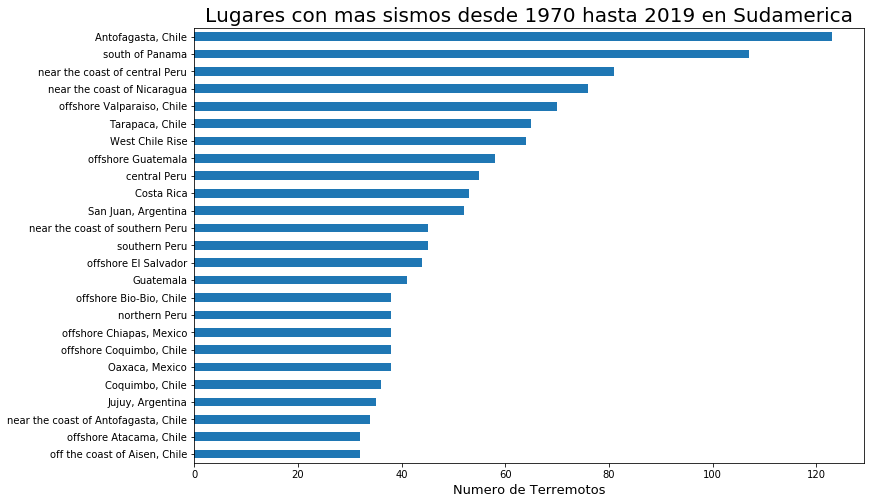

In [94]:
graf1_bonus=temblores_bonus['properties.place'].value_counts().head(25).sort_values()
plt.figure(figsize=(12,8))
graf1_bonus.plot(kind='barh')
plt.title('Lugares con mas sismos desde 1970 hasta 2019 en Sudamerica',fontdict={'fontsize':20})
plt.xlabel('Numero de Terremotos',fontdict={'fontsize':13});

In [95]:
time2= []
for x in temblores_bonus['properties.time']:
    when = datetime.datetime.fromtimestamp(x/1000).strftime('%Y-%m-%d-%H-%M-%S%z')
    time2.append('{0}'.format(when))
time2 = pd.DataFrame(time2,columns={'Time'})

In [96]:
time2=time2['Time'].str.split('-',5, expand=True).rename(columns={0:'Año',1:'Mes',2:'Dia',3:'Hora',4:'Min',5:'Seg'})

In [97]:
temblores_bonus=pd.concat([temblores_bonus,time2],axis=1)

In [98]:
temblores_bonus.loc[:,'Año':'Seg']=temblores_bonus[['Año','Mes','Dia','Hora','Min','Seg']].astype(int)

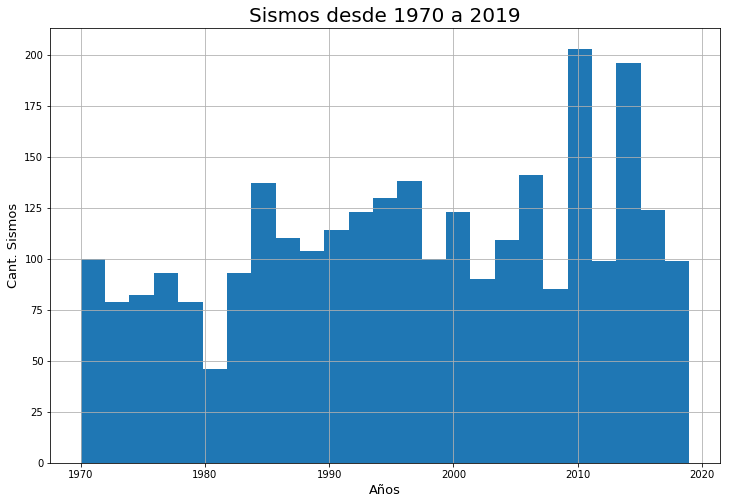

In [99]:
graf2_hist_bonus=temblores_bonus['Año']
plt.figure(figsize=(12,8))
graf2_hist_bonus.plot(kind='hist',bins=25,grid=True)
plt.title('Sismos desde 1970 a 2019',fontdict={'fontsize':20})
plt.ylabel('Cant. Sismos',fontdict={'fontsize':13})
plt.xlabel('Años',fontdict={'fontsize':13});

Se puede observar como en la ultima decada han habido años con una gran cantidad de Sismos en sudamerica en comparacion a los años 70 y 80

# Conclución

He aprendido a como consumir una API **(Application Programming Interface)** y obtener datos, en este caso de los sismos ocurridos registrados en la pagina "https://earthquake.usgs.gov/". Esto me abre el horizonte al consumo de otras API's y asi obtener datos de otras fuentes ademas de los archivos excel y csv. 